In [1]:
# import necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [2]:
# helper functions needed

def quick_eda_overall(df):
    
    # take a quick look at the data
    print("\nData:")
    print (df.head())
    
    # check data size
    print("\nData Size:")
    print (df.shape)
    
    # check overall info
    print("\nData Info:")
    print(df.info())

    # check for any missing values
    print("\nMissing Value Proportion:")
    print(df.isnull().sum()/df.shape[0])

def quick_eda_cols(df, numerical_cols, categorical_cols):
    
    # check distribution of numerical vars
    print("\nDistribution of Numerical Vars:")
    for col in numerical_cols:
        plt.figure(figsize=(8, 6))
        sns.histplot(df[col], bins=20, color='blue')
        plt.title(f"Histogram of {col}")
        plt.show()
        
        # check summary statistics
        print(f"\nSummary statistiscs of {col}:")
        print(df[numerical_cols].describe())

    # check distribution of categorical vars
    print("\nDistribution of Categorical Vars:")
    for col in categorical_cols:
        plt.figure(figsize=(8, 6))
        sns.countplot(y=col, data=df)
        plt.title(f"Countplot of {col}")
        plt.show()

        print(f"\nUnique values of {col}:")
        print(df[col].unique())

        print(f"\nValue counts of {col}:")
        print(df[col].value_counts())
        

def classify_income_types_freq_amount(row):
    
    # hard-coded definition threshold for now
    # will need domain expert's inputs for refinement
    
    # define salary payments by frequency and amount
    if row['count'] <= 2 and row['std'] < row['mean'] * 0.1:
        return 'Salary'
    # define gig payments by frequency and amount
    elif row['std'] > row['mean'] * 0.5:
        return 'Gig Economy'
    else:
        return 'Other'
        
# initialize Porter Stemmer
# stemmer = PorterStemmer()

stop_words = set(stopwords.words('english'))

def clean_description(description):
    
    # change to lower case
    description = description.lower()
    
    # remove numbers that do not follow directly after 'ATM'
    description = re.sub(r'\b(?<!ATM)(\d+\s+|\d+)', '', description)
    
    # remove punctuation and other non-word characters
    description = re.sub(r'[^\w\s]', '', description)
    
    # tokenize the description
    tokens = word_tokenize(description)
    
    # only remove stopwords for now
    cleaned_tokens = [word for word in tokens if word not in stop_words]
    
#     # remove stopwords and stem the remaining words
#     cleaned_tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]

    # rejoin the cleaned tokens into a single string
    return ' '.join(cleaned_tokens)

def classify_transactions(description):
    
    # keywords for different transaction types
    # hard-coded for now
    # will need domain expert's confirmation
    expense_keywords = ['purchase', 'fee', 'withdrawal']
    transfer_keywords = ['atm', 'transfer']
    pension_keywords = ['pension', 'retirement', 'ssa', '401k', 'social security']
    salary_keywords = ['salary', 'payroll', 'payrol', 'wages', 'ach', 'inc', 'llc']
    gig_keywords = ['uber', 'lyft', 'airbnb', 'upwork', 'instacart', 'zayzoon', 'freelance', 'consulting', 'gig pay', 'taskrabbit', 'cash', 'payout']
    
    # check for matching keywords in the description
    if any(word in description for word in expense_keywords):
        return 'Expense'
    elif any(word in description for word in transfer_keywords):
        return 'Transfer'
    elif any(word in description for word in pension_keywords):
        return 'Pension'
    elif any(word in description for word in salary_keywords):
        return 'Salary'
    elif any(word in description for word in gig_keywords):
        return 'Gig Economy'
    else:
        return 'Other'


# Quick Data EDA -- Transactions

In [3]:
# load in transacitons data
transactions = pd.read_parquet('./data/transactions.parquet')

In [4]:
# quick overall eda of transactions data
quick_eda_overall(df=transactions)


Data:
      account_id                                     id      version  pending  \
0  w4d61f7p31574  bQjKpjODw8cLVEZB6kD9fezbXe90Rot9nVoJ9  1.000000000        0   
1  w4d61f7p31574  Kj49Y4B0PmTqEyBrvg7ocAKXeANjODhN9eX3X  1.000000000        0   
2  w4d61f7p31574  nnrDNrPjA4ioerJ0qXd8udLnrNznJes7zYNwO  1.000000000        0   
3  w4d61f7p31574  4aZEXZ83nBTQR8nYo6zgc6BZaMgZAOcq3K80x  1.000000000        0   
4  w4d61f7p31574  bQjKpjODw8cLVEZB6kD9fez4dN04ZQs9nVoz0  1.000000000        0   

   removed     f0_ currency_code        date authorized_date  \
0        0  -15.65           USD  2022-03-31            None   
1        0 -225.98           USD  2022-09-26            None   
2        0   -3.00           USD  2021-11-22            None   
3        0 -110.87           USD  2022-02-14            None   
4        0   54.18           USD  2021-11-24            None   

                                                name city region  \
0  DEBIT CARD PURCHASE, *****30100057355, AUT 032... 

In [5]:
# convert date columns to datetime type
transactions['date'] = pd.to_datetime(transactions['date'])
transactions['authorized_date'] = pd.to_datetime(transactions['authorized_date'])

# convert pending and removed to the right data type
transactions['pending'] = transactions['pending'].astype('str')
transactions['removed'] = transactions['removed'].astype('str')


Distribution of Numerical Vars:


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


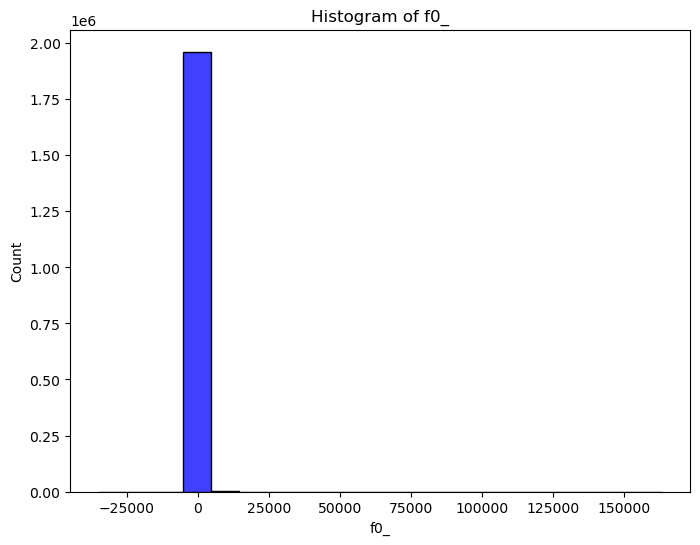


Summary statistiscs of f0_:
                f0_
count  1.962485e+06
mean  -2.106400e-01
std    3.549162e+02
min   -3.498050e+04
25%   -3.490000e+01
50%   -1.200000e+01
75%   -2.320000e+00
max    1.634890e+05

Distribution of Categorical Vars:


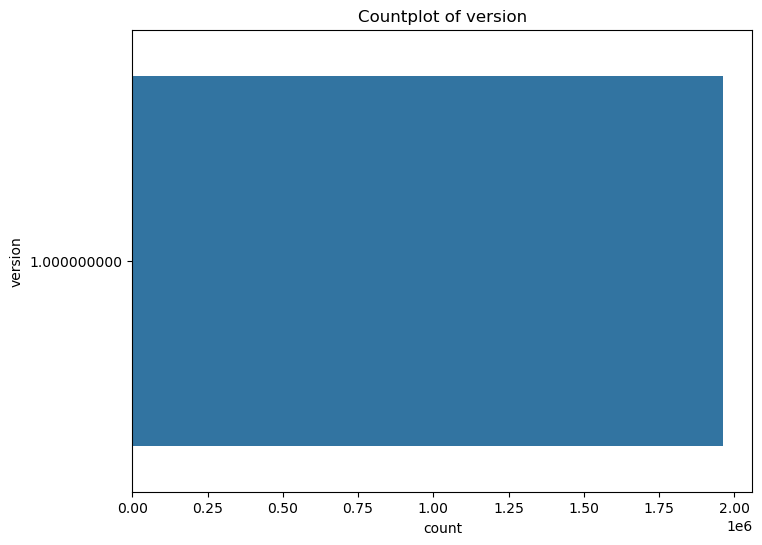


Unique values of version:
[Decimal('1.000000000')]

Value counts of version:
version
1.000000000    1962485
Name: count, dtype: int64


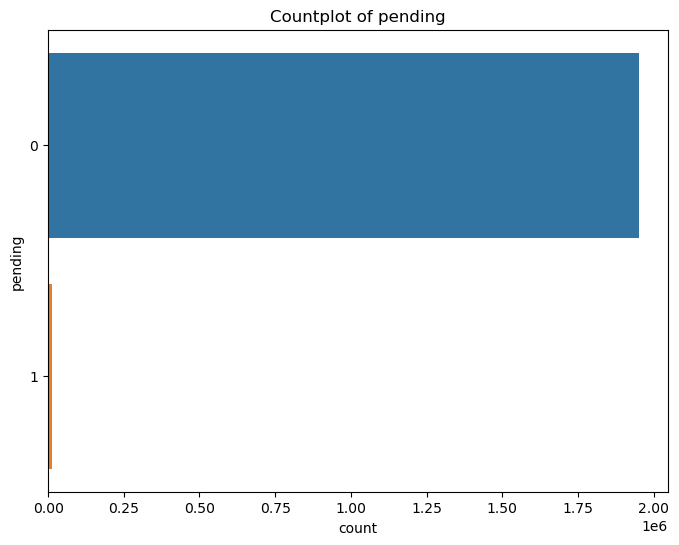


Unique values of pending:
['0' '1']

Value counts of pending:
pending
0    1950838
1      11647
Name: count, dtype: int64


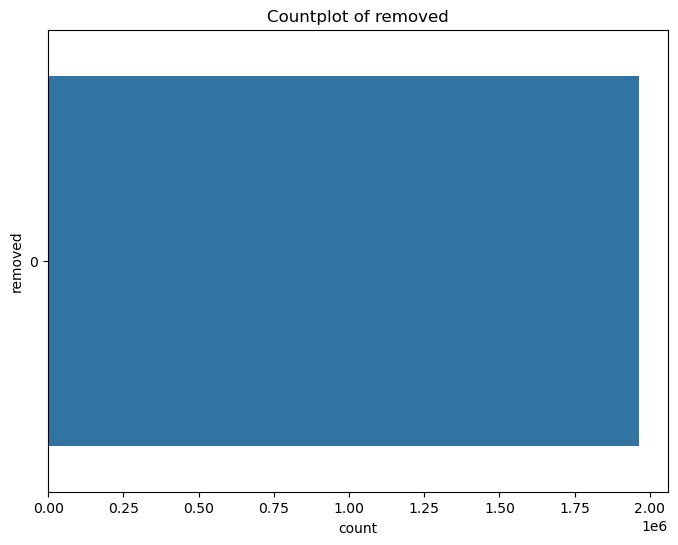


Unique values of removed:
['0']

Value counts of removed:
removed
0    1962485
Name: count, dtype: int64


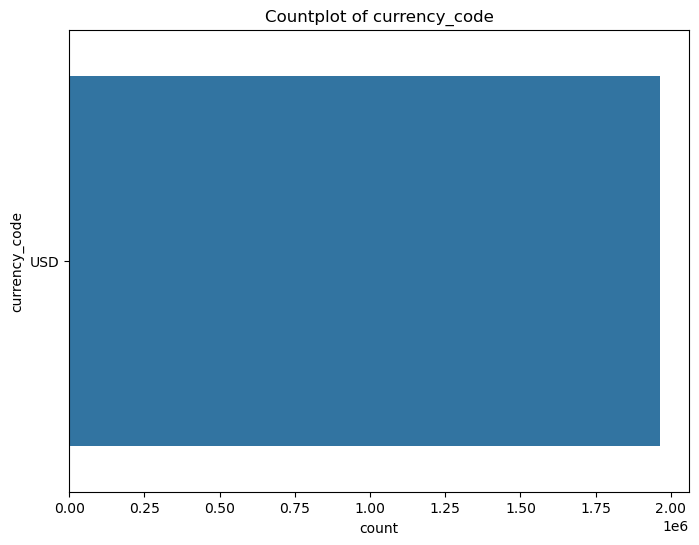


Unique values of currency_code:
['USD']

Value counts of currency_code:
currency_code
USD    1962485
Name: count, dtype: int64


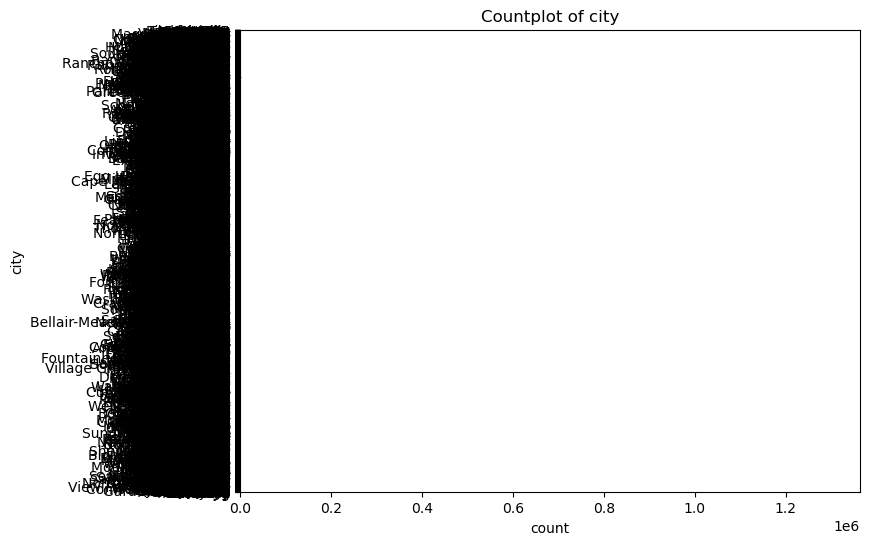


Unique values of city:
['' 'Anchorage' 'Juneau' ... 'Montvale' 'East Troy' 'Fall Creek']

Value counts of city:
city
                 1297997
New York           20769
Los Angeles        17355
Chicago            14594
San Francisco      13851
                  ...   
Hopkinton              1
Sutherlin              1
Wheeler                1
Randolph Town          1
Fall Creek             1
Name: count, Length: 6677, dtype: int64


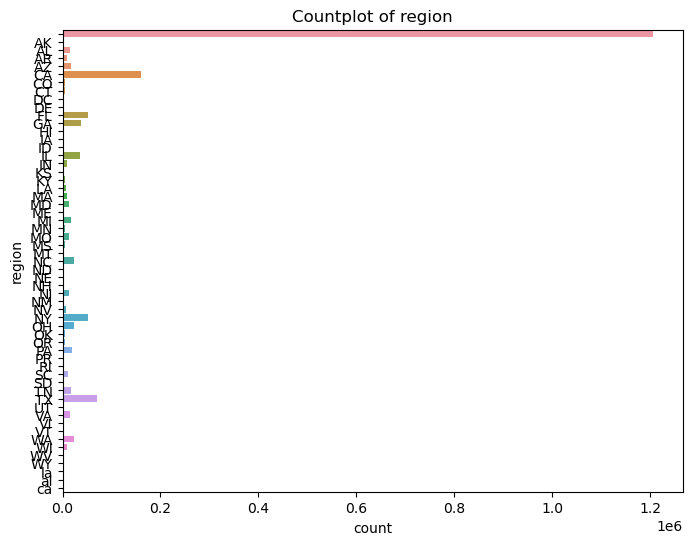


Unique values of region:
['' 'AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID'
 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC'
 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'PR' 'RI' 'SC'
 'SD' 'TN' 'TX' 'UT' 'VA' 'VI' 'VT' 'WA' 'WI' 'WV' 'WY' 'la' 'al' 'ca']

Value counts of region:
region
      1205900
CA     160179
TX      71021
FL      52939
NY      52806
GA      37214
IL      36454
WA      24034
NC      23629
OH      22944
PA      19863
AZ      17730
TN      17266
MI      16617
VA      16110
AL      15776
MO      13520
MD      13261
NJ      12388
SC      11432
MA       9931
AR       9615
IN       9175
WI       8606
LA       7079
NV       6875
CO       6035
OR       5801
OK       5379
CT       5005
MN       4505
MS       4122
KY       4083
KS       3465
NM       3458
IA       3243
SD       2923
UT       2908
WV       2665
DE       2647
RI       2337
HI       2291
NE       2133
NH       1536
ID       1320
AK       1045
DC        

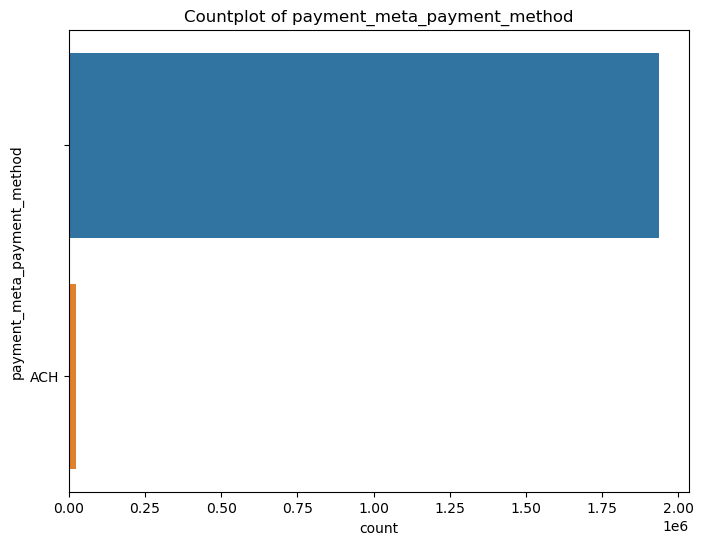


Unique values of payment_meta_payment_method:
['' 'ACH']

Value counts of payment_meta_payment_method:
payment_meta_payment_method
       1937221
ACH      25264
Name: count, dtype: int64


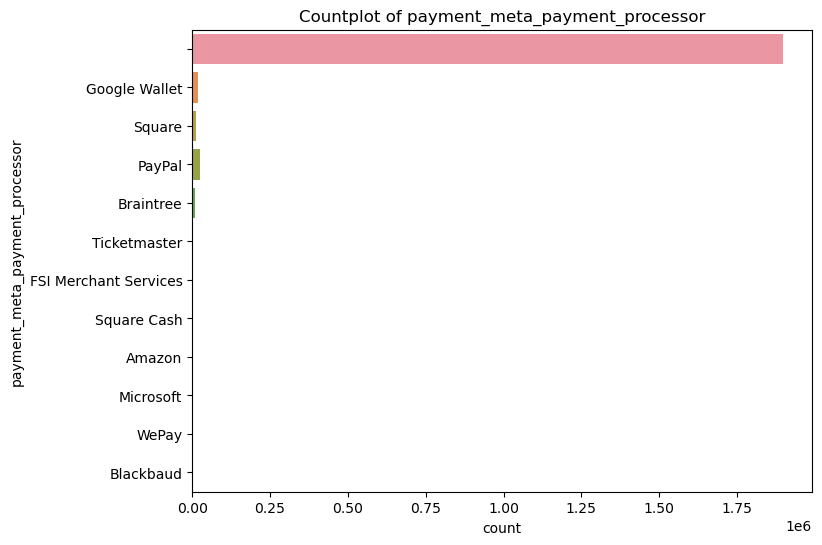


Unique values of payment_meta_payment_processor:
['' 'Google Wallet' 'Square' 'PayPal' 'Braintree' 'Ticketmaster'
 'FSI Merchant Services' 'Square Cash' 'Amazon' 'Microsoft' 'WePay'
 'Blackbaud']

Value counts of payment_meta_payment_processor:
payment_meta_payment_processor
                         1896195
PayPal                     25771
Google Wallet              18451
Square                     13098
Braintree                   7550
Square Cash                  633
FSI Merchant Services        466
Ticketmaster                 134
Amazon                       130
WePay                         40
Microsoft                     10
Blackbaud                      7
Name: count, dtype: int64


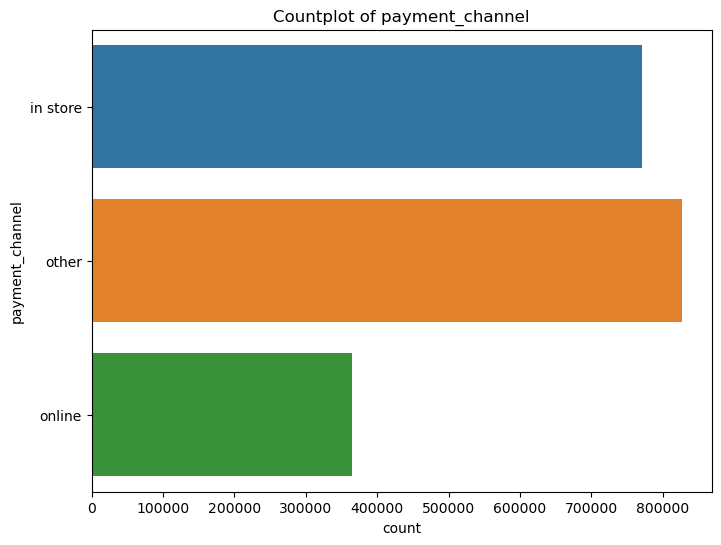


Unique values of payment_channel:
['in store' 'other' 'online']

Value counts of payment_channel:
payment_channel
other       827031
in store    771346
online      364108
Name: count, dtype: int64


In [6]:
# # quick eda for each column of transactions data
trans_num_cols = ['f0_'
                 ]
trans_categorical_cols = ['version', 
                          'pending', 
                          'removed', 
                          'currency_code', 
                          'city', 
                          'region',
                          'payment_meta_payment_method',
                          'payment_meta_payment_processor',
                          'payment_channel'
                     ]
quick_eda_cols(df=transactions, numerical_cols=trans_num_cols, categorical_cols=trans_categorical_cols)

In [7]:
# drop columns that only have one unique value
transactions = transactions.drop(columns=['version',
                                          'removed', 
                                          'currency_code'
                                         ]
                                ) 

# fix typo for region
transactions['region'] = transactions['region'].str.upper()

# Quick Data EDA -- Advances

In [8]:
# load in advances data
advances = pd.read_parquet('./data/advances.parquet')
advances.shape

(1904, 5)

In [9]:
# quick overall eda of advances data
quick_eda_overall(df=advances)


Data:
      account_id                    state          amount    due_date  \
0  0adv34tf69c76  ADVANCE_STATE_REPAYMENT  5000.000000000  2023-01-09   
1  ahmdvxy8kq3gj  ADVANCE_STATE_REPAYMENT  5000.000000000  2023-01-09   
2  1jq4t1y123xd4  ADVANCE_STATE_REPAYMENT  5000.000000000  2023-01-08   
3  k9tw3fj0c6fp0  ADVANCE_STATE_REPAYMENT  5000.000000000  2023-01-23   
4  bahm3606b8rse  ADVANCE_STATE_REPAYMENT  5000.000000000  2023-01-08   

  repaid_on  
0      None  
1      None  
2      None  
3      None  
4      None  

Data Size:
(1904, 5)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   account_id  1904 non-null   object
 1   state       1904 non-null   object
 2   amount      1904 non-null   object
 3   due_date    1904 non-null   object
 4   repaid_on   1591 non-null   object
dtypes: object(5)
memory usage: 74.5+ KB
None

Mis

In [10]:
# convert date columns to datetime type
advances['due_date'] = pd.to_datetime(advances['due_date'])
advances['repaid_on'] = pd.to_datetime(advances['repaid_on'])

# convert amount to the right data type
advances['amount'] = advances['amount'].astype('float64')


Distribution of Numerical Vars:


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


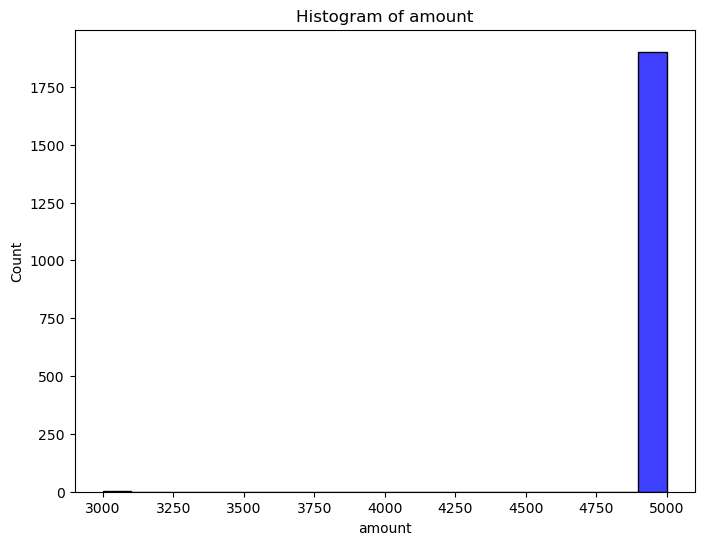


Summary statistiscs of amount:
            amount
count  1904.000000
mean   4997.899160
std      64.803339
min    3000.000000
25%    5000.000000
50%    5000.000000
75%    5000.000000
max    5000.000000

Distribution of Categorical Vars:


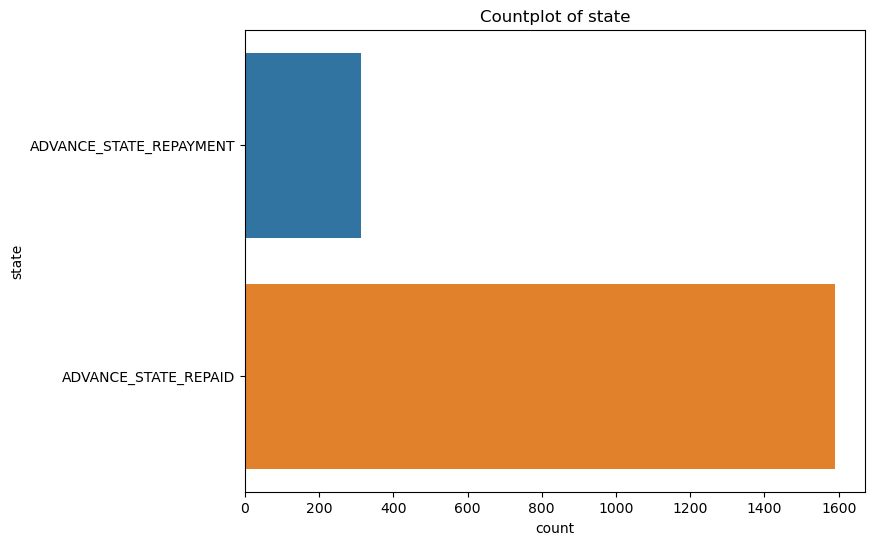


Unique values of state:
['ADVANCE_STATE_REPAYMENT' 'ADVANCE_STATE_REPAID']

Value counts of state:
state
ADVANCE_STATE_REPAID       1591
ADVANCE_STATE_REPAYMENT     313
Name: count, dtype: int64


In [11]:
# quick eda for each column of transactions data
advs_num_cols = ['amount'
                 ]
advs_categorical_cols = ['state'
                     ]
quick_eda_cols(df=advances, numerical_cols=advs_num_cols, categorical_cols=advs_categorical_cols)

# User Segmentation by Income types

There are several ways to segment the users by their income types using the available transaction data. 

Transaction Frequency & Amount: Salary payments are typically made at regular intervals, such as bi-weekly or monthly while gig economy incomes tend to be more irregular and  may vary significantly in their timing. Similary to frequency, the amount of the payments can be taken into consideration while determining the income types. Salary payments are usually consistent in amount while income from gigs often varies based on the volumn of work completed. Therefore, one way to detemine the income types is to look at the payment frequencies and amounts.  

Transaction Description: Another way to segment the users is to look at the transaction details. We can use keywords related to different income soures after cleaning up the text with NLP techniques like tokenization, stop words removal and stemming/lemmatization. 

Clustering: Finally, a proposed way to segment the users is to use unsupervised learning techniques such as clustering making use of the frequency and amount of the payments as well as the cleaned up transaction descriptions.


<Axes: >

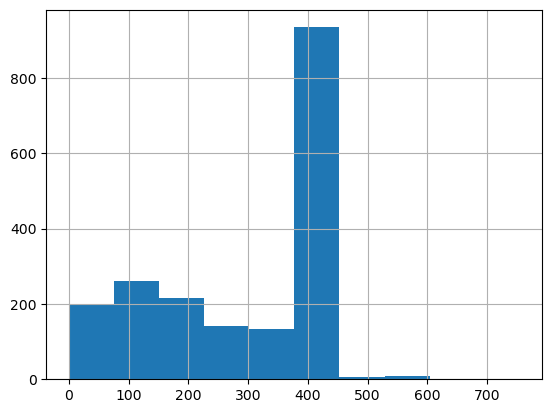

In [12]:
# check distribution of the transactions length
transactions_len = pd.to_timedelta(transactions.groupby('account_id')['date'].max() - transactions.groupby('account_id')['date'].min()).dt.days.reset_index()
transactions_len['date'].hist()

In [13]:
# filter to only include positive transactions
pos_transactions = transactions[transactions.f0_ > 0]

# group data by account_id and summarize data by frequency and amount
grouped = pos_transactions.groupby(['account_id', pd.Grouper(key='date', freq='M')])
summary = grouped['f0_'].agg(['sum', 'mean', 'std', 'count'])

# categorize income types by frequency and amount
summary['income_types'] = summary.apply(classify_income_types_freq_amount, axis=1)

In [14]:
# name column contains transaction details
# clean up the transaction descriptions for next steps

transactions['trans_descp'] = transactions['name'].apply(clean_description)
transactions['transaction_types'] = transactions['trans_descp'].apply(classify_transactions)

# filter to only include positive transactions
pos_transactions = transactions[transactions.f0_ > 0]

# filter for different income types
filtered_pos_transactions = pos_transactions[pos_transactions.transaction_types.isin(['Salary', 'Pension', 'Gig Economy', 'Other'])]

In [15]:
income_types = (filtered_pos_transactions
                .groupby('account_id')['transaction_types']
                .unique()
                .reset_index()
                .rename(columns={'transaction_types': 'income_types'})
               )
income_source_nums = (filtered_pos_transactions
               .groupby('account_id')['transaction_types']
               .nunique()
               .reset_index()
               .rename(columns={'transaction_types': 'income_source_nums'})
              )
income_amount = (filtered_pos_transactions
               .groupby(['account_id', 'transaction_types'])['f0_']
               .sum()
               .reset_index()
               .rename(columns={'f0_': 'income_amount'})
              )
final_incomes = (income_types
                 .merge(income_source_nums, on='account_id')
                 .merge(income_amount, on='account_id')
                )

Let's look at the results using the first two approaches proposed. From the example below, we can see that both approaches identified gig economy as one of the income sources for user '00j9a14cpe87j'. However, whether salary is another income source is not consistent between the two approaches. When examing the transaction descriptions, we can see that there are keywords like 'salary'. Therefore, the NLP apporach might be more reliable and further refinement for the frequeny & amount approach will be needed.

In [16]:
summary.loc[pd.IndexSlice['00j9a14cpe87j', :], :]

sum        mean          std  count income_types
account_id    date                                                            
00j9a14cpe87j 2021-11-30  1016.68  338.893333   120.039987      3        Other
              2021-12-31  1767.14  294.523333   167.028867      6  Gig Economy
              2022-01-31  1185.34  237.068000   157.422964      5  Gig Economy
              2022-02-28  6112.21  764.026250  1730.599958      8  Gig Economy
              2022-03-31  1748.77  174.877000   146.470890     10  Gig Economy
              2022-04-30  2713.96  542.792000   337.325000      5  Gig Economy
              2022-05-31  1990.27  398.054000   111.985024      5        Other
              2022-06-30  1297.99  324.497500    67.552235      4        Other
              2022-07-31  1491.28  248.546667   161.290126      6  Gig Economy
              2022-08-31  1917.16  319.526667   123.629258      6        Other
              2022-09-30  1415.50  283.100000   161.229484      5  Gig Economy
              2022-10-31  1963.46  130.897333   153.507780     15  Gig Economy
              2022-11-30  2556.23  213.019167   175.667816     12  Gig Economy
              2022-12-31  2037.02  254.627500   184.301104      8  Gig Economy
              2023-01-31  1827.68  203.075556   158.842925      9  Gig Economy

In [17]:
final_incomes[final_incomes.account_id == '00j9a14cpe87j']

,account_id,income_types,income_source_nums,transaction_types,income_amount
0,00j9a14cpe87j,"[Gig Economy, Salary, Other]",3,Gig Economy,2632.89
1,00j9a14cpe87j,"[Gig Economy, Salary, Other]",3,Other,1814.77
2,00j9a14cpe87j,"[Gig Economy, Salary, Other]",3,Salary,26593.03


In [18]:
filtered_pos_transactions[filtered_pos_transactions.account_id == '00j9a14cpe87j'].head()

,account_id,id,pending,f0_,date,authorized_date,name,city,region,payment_meta_payment_method,payment_meta_payment_processor,payment_channel,bank_account_id,trans_descp,transaction_types
42541,00j9a14cpe87j,YNYRNjRqwVHApodDoAD1HoqbO1A0Aqu91XgrY,0,17.03,2022-10-17,2022-10-17,POS Deposit / Cash App*Cash Out 4829 (2022-10-...,,,,,other,bNYXN9XRyeHB5ZPzZBzLHZveMQZE9qC9gzK8J,pos deposit cash appcash visa direct ca,Gig Economy
42544,00j9a14cpe87j,7PBbPmb4YAFAMkoXkAXxHwN7rqYgYNfYBJRDP,0,405.82,2021-11-23,2021-11-23,POS Deposit / Cash App*Cash Out 4829 (2021-11-...,,,,,other,bNYXN9XRyeHB5ZPzZBzLHZveMQZE9qC9gzK8J,pos deposit cash appcash visa direct ca,Gig Economy
42545,00j9a14cpe87j,DaJNakN61bhyJ74X7yXMUYq1jPRmRqHgnLpYA,0,259.04,2022-07-26,NaT,ACH Deposit / Haza Foods of No 9871264070 REG....,,,ACH,,other,bNYXN9XRyeHB5ZPzZBzLHZveMQZE9qC9gzK8J,ach deposit haza foods regsalary haza foods ne,Salary
42546,00j9a14cpe87j,Bra8ry8dm5FBM5YE5BEmHjbym3747bINMbazd,0,411.39,2022-11-22,NaT,ACH Deposit / HAZA Foods of NE 1871264070 REG....,,,ACH,,other,bNYXN9XRyeHB5ZPzZBzLHZveMQZE9qC9gzK8J,ach deposit haza foods ne regsalary haza foods ne,Salary
42547,00j9a14cpe87j,eNYmNxm7AeH1oOgRO1R0HOx9jDd7dxtaQg5jr,0,99.00,2022-10-24,NaT,Check Deposi,,,,,other,bNYXN9XRyeHB5ZPzZBzLHZveMQZE9qC9gzK8J,check deposi,Other


# Modeling "Next Pay Day"

To model the next pay day, we would need the transaction date, transaction amount, transaction descriptions and its corresponding transaction category (i.e. salary, pension, gig economy or other) for each user. If the income source for our users are only salary, it would be a much easier problem to solve since salaries are typically paid on a regular basis. A simple rule-based model might be sufficient. However, for our use case, we need to consider gig economy as another income source, which has a much greater variability in terms of frequency and amounts. 

Depending on how much data we can potentially obtain, we can choose to develop either a tree based model such as Random Forests or XGBoost or a deep learning model with RNN or LSTM. While tree based models can provide good interpretability, deep learning models are better at capturing the complex relationships and interactions between the data.

In terms of the evaluation metrics, we can calculate the day differences between the true pay date and the predicted pay date and use MAE or RMSE to evaluate the model's performance. It is also essential to use cross validation while evaluating the model performance to ensure the model also performs well on unseen data.

In [19]:
# this data can be used for inital modeling
# as this is already filtered to only include income transactions
filtered_pos_transactions.head()

,account_id,id,pending,f0_,date,authorized_date,name,city,region,payment_meta_payment_method,payment_meta_payment_processor,payment_channel,bank_account_id,trans_descp,transaction_types
14,w4d61f7p31574,9589X8gvxATeNg3rY0pJhVjgoVOQ3niy1L4KL,0,60.00,2022-09-01,NaT,"ACH DEPOSIT, WISELY ACH P2PTRANSFR 8683261 J ROM",,,ACH,,other,00kEXk41nDi5v4yjokE7TqDA4jxAeVhdDYMKz,ach deposit wisely ach p2ptransfr j rom,Salary
16,w4d61f7p31574,J04Op4qv1Ji873Ej6YVpIN0DeNkjmdskyavoX,0,1135.21,2022-09-23,NaT,"ACH DEPOSIT, CTC ACADEMY INC DIRECT DEP ****85...",,,ACH,,other,00kEXk41nDi5v4yjokE7TqDA4jxAeVhdDYMKz,ach deposit ctc academy inc direct dep rf,Salary
19,w4d61f7p31574,nnrDNrPjA4ioerJ0qXd8udLq6dBzMpT7zYN0v,0,25.00,2022-05-26,NaT,"ACH DEPOSIT, WISELY ACH P2PTRANSFR 7646515 J ROM",,,ACH,,other,00kEXk41nDi5v4yjokE7TqDA4jxAeVhdDYMKz,ach deposit wisely ach p2ptransfr j rom,Salary
32,w4d61f7p31574,gEjAOjn3P8tEegrP3wRaun7o7dVN8xuAJvAAz,0,100.00,2022-11-09,2022-11-09,WISELY ACH P2PTRANSF,,,ACH,,other,00kEXk41nDi5v4yjokE7TqDA4jxAeVhdDYMKz,wisely ach p2ptransf,Salary
51,w4d61f7p31574,kEjwOjLAybtQY0epkd1OcPmgVPaAwncE5rjwk,0,105.00,2022-09-13,NaT,"ACH DEPOSIT, PW-MONEYLION P2P JOHN ROMANIC",,,ACH,,other,00kEXk41nDi5v4yjokE7TqDA4jxAeVhdDYMKz,ach deposit pwmoneylion p2p john romanic,Salary


# Modeling "If a user will repay on time"

In [20]:
# when state == 'ADVANCE_STATE_REPAYMENT', there is no repaid data
# need to confirm what this means
# drop those data from modeling for now
advances[advances.state == 'ADVANCE_STATE_REPAYMENT']

,account_id,state,amount,due_date,repaid_on
0,0adv34tf69c76,ADVANCE_STATE_REPAYMENT,5000.0,2023-01-09,NaT
1,ahmdvxy8kq3gj,ADVANCE_STATE_REPAYMENT,5000.0,2023-01-09,NaT
2,1jq4t1y123xd4,ADVANCE_STATE_REPAYMENT,5000.0,2023-01-08,NaT
3,k9tw3fj0c6fp0,ADVANCE_STATE_REPAYMENT,5000.0,2023-01-23,NaT
4,bahm3606b8rse,ADVANCE_STATE_REPAYMENT,5000.0,2023-01-08,NaT
...,...,...,...,...,...
1801,smk2wzwny3gc8,ADVANCE_STATE_REPAYMENT,5000.0,2023-02-24,NaT
1802,2p6hbc9pg2d6y,ADVANCE_STATE_REPAYMENT,5000.0,2023-02-24,NaT
1803,f5czpvh022yyc,ADVANCE_STATE_REPAYMENT,5000.0,2023-02-24,NaT
1804,cbe5wyeety8hw,ADVANCE_STATE_REPAYMENT,5000.0,2023-02-24,NaT


In [21]:
# only keep when state == 'ADVANCE_STATE_REPAID'
repaid_advances = advances[advances.state == 'ADVANCE_STATE_REPAID']

# calculate day difference between due date and paid date
repaid_advances['pay_due_diff'] = pd.to_timedelta(repaid_advances['repaid_on'] - repaid_advances['due_date']).dt.days

/var/folders/b_/st9km73968j9zr27ytw2v1680000gn/T/ipykernel_18806/2727003423.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repaid_advances['pay_due_diff'] = pd.to_timedelta(repaid_advances['repaid_on'] - repaid_advances['due_date']).dt.days


Let's first look at how soon will people repay the balances. From the histogram below, we can see that most people will repay the balance within 50 days. 

In [22]:
repaid_advances['pay_due_diff'].describe()

count    1591.000000
mean        8.487115
std        31.097589
min       -22.000000
25%         0.000000
50%         0.000000
75%         2.000000
max       314.000000
Name: pay_due_diff, dtype: float64

<Axes: >

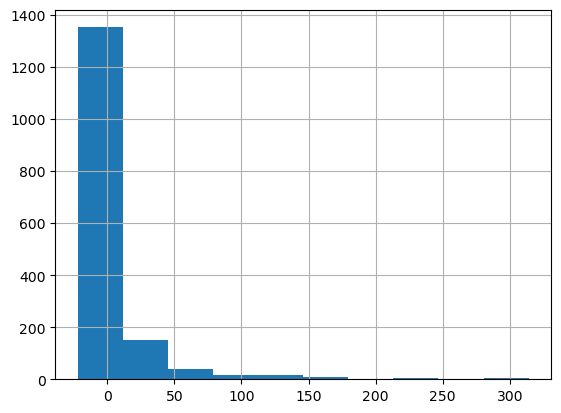

In [23]:
repaid_advances['pay_due_diff'].hist()

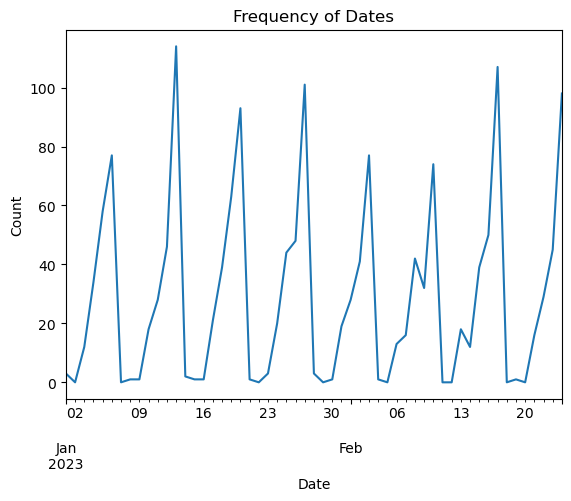

In [24]:
tmp_due_df = repaid_advances.set_index('due_date')
tmp_due_df.resample('D').size().plot()

plt.title('Frequency of Dates')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

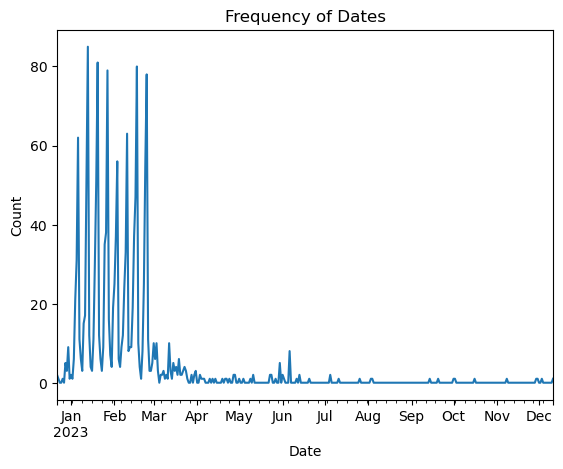

In [25]:
tmp_repay_df = repaid_advances.set_index('repaid_on')
tmp_repay_df.resample('D').size().plot()

plt.title('Frequency of Dates')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

In [26]:
# define the modeling target variable to be 1 if the advance is paid within 35 days of the due date
# otherwise 0
repaid_advances['paid_on_time'] = [1 if x <= 35 else 0 for x in repaid_advances['pay_due_diff']]

/var/folders/b_/st9km73968j9zr27ytw2v1680000gn/T/ipykernel_18806/1467584263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repaid_advances['paid_on_time'] = [1 if x <= 35 else 0 for x in repaid_advances['pay_due_diff']]


In [28]:
# after conversion, we can see 93.5% of the data are in the postive class
# while 6.5% of them are in the negative class
# we don't have a very balanced dataset, but seems to be ok for now
repaid_advances['paid_on_time'].value_counts()/repaid_advances.shape[0]

paid_on_time
1    0.935889
0    0.064111
Name: count, dtype: float64

In [37]:
# will income sources have preditive power for whether the user will repay?
check_power = pd.merge(repaid_advances, final_incomes, on='account_id')[['pay_due_diff',
                                                                         'paid_on_time',
                                                                         'income_source_nums',
                                                                         'income_amount'
                                                                        ]].drop_duplicates()
check_power.head()

,pay_due_diff,paid_on_time,income_source_nums,income_amount
0,-3,1,2,8632.14
1,-3,1,2,300.27
2,-2,1,3,294.87
3,-2,1,3,46446.98
4,-2,1,3,4470.00


In [61]:
# check correlation
correlation, p_value = stats.pointbiserialr(check_power['paid_on_time'], check_power['income_source_nums'])
print(f"Point-biserial correlation between paid_on_time and income_source_nums: {correlation}, P-value: {p_value}")

correlation, p_value = stats.pointbiserialr(check_power['paid_on_time'], check_power['income_amount'])
print(f"Point-biserial correlation between paid_on_time and income_amount: {correlation}, P-value: {p_value}")

Point-biserial correlation between paid_on_time and income_source_nums: 0.021962957000557705, P-value: 0.15236601826833288
Point-biserial correlation between paid_on_time and income_amount: 0.00822966021640589, P-value: 0.5917974051705888


                    pay_due_diff  income_source_nums  income_amount
pay_due_diff            1.000000           -0.038951      -0.024056
income_source_nums     -0.038951            1.000000      -0.010464
income_amount          -0.024056           -0.010464       1.000000


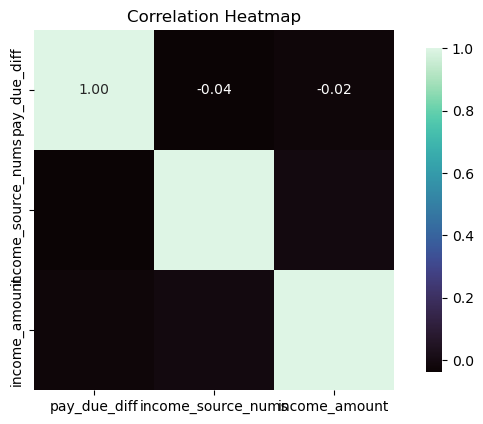

In [59]:
correlation_matrix = check_power[['pay_due_diff', 'income_source_nums', 'income_amount']].corr()
print (correlation_matrix)
# visualize correlation with a heatmap
plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='mako', square=True, cbar_kws={'shrink': .9})

plt.title('Correlation Heatmap')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.3)
plt.show()

By looking at the correlation values and the correlation heatmap, we can see that the income source numbers and income amount themselves do not provide a lot of information for preditcing whether a user will repay in time. This is not a surprise as the user's spending behaviors will also have great impacts on his or her ability to repay the loan. Therefore, we would need the whole transations data for developing this model. Other information like demographic info, more detailed employment info and assets info could all be potentially useful. 

Unlike predicting the pay date, predicting whether a user will repay in time is a classification problem, thus accuracy or False Positive Rate/False Negative Rate will be more suitable to use while evaluating the model performance. Depending on the business requirements, F1 score could be a good candidate to use as it balances between precision and recall.

Instead of predicting a fixed class, we can also predict the probability of a user's repayment. In this case, we can use ROC curve as a way for model performance evaluation. As always, cross validation will be needed to ensure the model has good generalization.